<a href="https://colab.research.google.com/github/d-hackmt/Fundamentalss-of-Deep-Learning/blob/main/Gradient_descent_for_neural_network2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PArt 2

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving insurance.csv to insurance.csv


## Implement Gradient Descent For Neural Network (or Logistic Regression) . Using Python from scratch at the end



Predicting if a person would buy life insurnace based on his age using logistic regression.

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
df = pd.read_csv("insurance.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
df.shape

(28, 3)

Split train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df[['age','affordibility']], df.bought_insurance , test_size = 0.2 , random_state=25)

In [ ]:
X_train

,age,affordibility
0,22,1
13,29,0
6,55,0
17,58,1
24,50,1
19,18,1
25,54,1
16,25,0
20,21,1
3,52,0


In [ ]:
len(X_train)

22

Preprocessing: Scale the data so that both age and affordibility are in same scaling range

lets scale our age from 0 - 1

we do this to bring our age and affordiblity on the same scale

In [ ]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] /100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] /100



In [ ]:
X_train_scaled

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1
19,0.18,1
25,0.54,1
16,0.25,0
20,0.21,1
3,0.52,0


Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network

Using tf simple neural network to predict the buying insurance.

Here we initilize our weights as 1 and bias as 0.

Binary Cross entropy is same as logloss

By changing epochs alot of time we reached 5000 where the accuracy was 0.9 

so change epochs for better accuracy


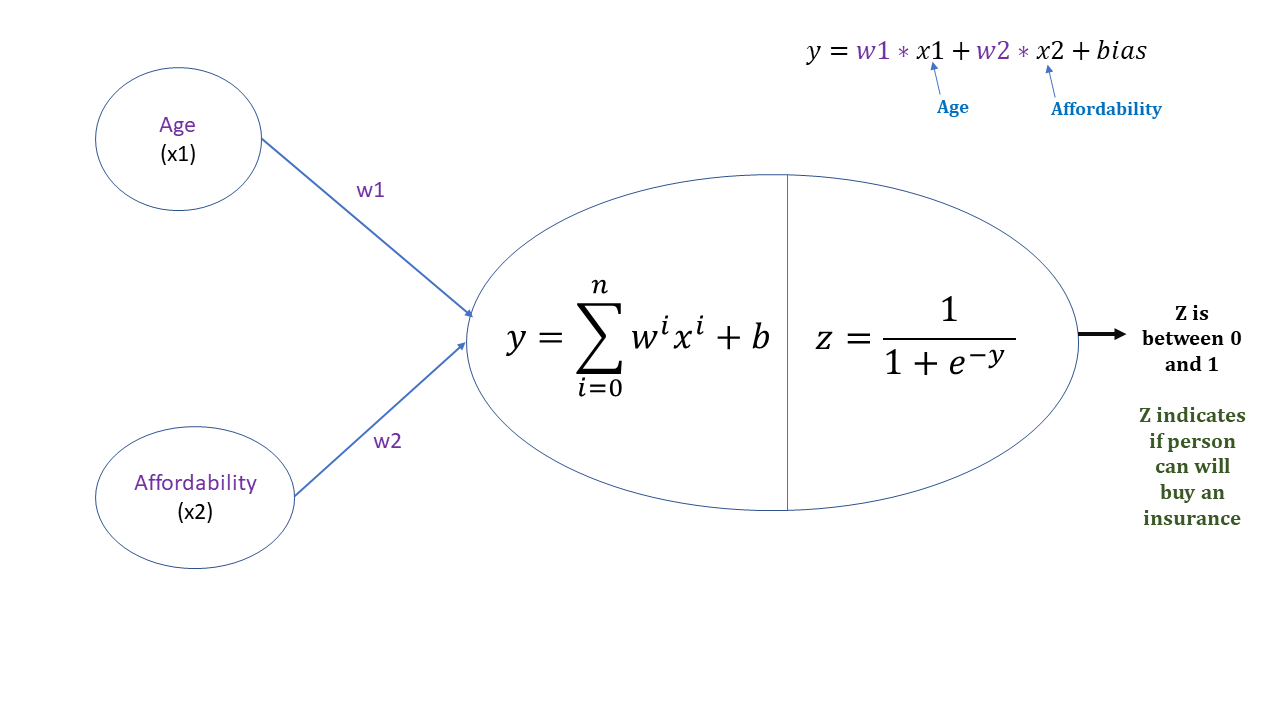

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 6ms/step - loss: 0.5392 - accuracy: 0.7273
Epoch 2323/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.5392 - accuracy: 0.7273
Epoch 2324/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5391 - accuracy: 0.7273
Epoch 2325/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.5391 - accuracy: 0.7273
Epoch 2326/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.5391 - accuracy: 0.7273
Epoch 2327/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.5390 - accuracy: 0.7273
Epoch 2328/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.5390 - accuracy: 0.7273
Epoch 2329/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.5389 - accuracy: 0.7273
Epoch 2330/5000
1/1 [==============================] - 0s 63ms/step - loss: 0.5389 - accuracy: 0.7273
Epoch 2331/5000
1/1 [===========================

Evaluate the model on test set

In [ ]:
model.evaluate(X_test_scaled , y_test)

1/1 [==============================] - 1s 963ms/step - loss: 0.3550 - accuracy: 1.0000


[0.35497748851776123, 1.0]

In [ ]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [ ]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 138ms/step


array([[0.7054848 ],
       [0.35569543],
       [0.16827847],
       [0.47801173],
       [0.72606975],
       [0.8294984 ]], dtype=float32)

In [ ]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

Now get the value of weights and bias from the model

i want to know my w1 and w2 and bias when its 0.9 accurate

In [ ]:
coef , intercept = model.get_weights()          # this is a tf method to get those
coef , intercept

(array([[5.0608673],
        [1.4086503]], dtype=float32), array([-2.913703], dtype=float32))

This means w1=5.060867, w2=1.4086502, bias =-2.9137027

lets implement the same method from scratch in python without using tf 

lets do a simple prediction 

In [ ]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [ ]:
X_test

,age,affordibility
2,47,1
10,18,1
21,26,0
11,28,1
14,49,1
9,61,1


Instead of model.predict, write our own prediction function that uses w1,w2 and bias

In [ ]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1)

0.705484819775958

In [ ]:
prediction_function(.18, 1)

0.35569544317951163

Now we start implementing gradient descent in plain python.

Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent.

First write couple of helper routines such as sigmoid and log_loss

In [ ]:
def sigmoid_numpy(X):          #sigmoid of entire array
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [ ]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

All right now comes the time to implement our final gradient descent function !! yay !!!

In [ ]:
class myNN:
  def __init__(self):
    self.w1 = 1
    self.w2 = 1
    self.bias = 0


  #lets call fit method
  def fit(self,X,y ,epochs,loss_thresold):
    self.w1 , self.w2 , self.bias = self.gradient_descent(X['age'] , X['affordibility'], y , epochs , loss_thresold ) # we get tuple w w2 and bias and we will store that in class member 

  def predict(self,X_test):                # in every neural there are 2 mathematical components weighted sum and sigmoid
    weighted_sum = self.w1 * X_test['age'] + self.w2 * X_test['affordibility'] + self.bias
    return sigmoid_numpy(weighted_sum)


  def gradient_descent(self , age, affordability, y_true, epochs, loss_thresold):   # i want to stop or break my epochs when my loss is 0.4631 using threshold
  #lets initilize our weights and bias                                       # because 1000 epochs is alot and our learning is going wrong 
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias         #numpy vector operations   
        y_predicted = sigmoid_numpy(weighted_sum)                   #take weighted sum and aplly sigmoid very simple 
        loss = log_loss(y_true, y_predicted)                        #calculate log loss

        #now once we have this we have to update our weights using derivative function we have

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 
        bias_d = np.mean(y_predicted-y_true)
        
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        if i%50 ==0 :
          print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
          print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')  #we print this to know what are our values after break 
          break

    return w1, w2, bias



In [ ]:
customModel = myNN()
customModel.fit(X_train_scaled , y_train , epochs = 500 ,loss_thresold = 0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:50, w1:1.503319554173139, w2:1.108384790367645, bias:-1.2319047301235464, loss:0.5675865113475955
Epoch:100, w1:2.200713131760032, w2:1.2941584023238903, bias:-1.6607009122062801, loss:0.5390680417774752
Epoch:150, w1:2.8495727769689085, w2:1.3696895491572745, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:200, w1:3.443016970881803, w2:1.4042218624465033, bias:-2.2571369883752723, loss:0.5005011269691375
Epoch:250, w1:3.982450494649576, w2:1.4239127329321233, bias:-2.494377365971801, loss:0.48654089537617085
Epoch:300, w1:4.472179522095915, w2:1.438787986553552, bias:-2.707387811922373, loss:0.4750814640632793
Epoch:350, w1:4.917245868007634, w2:1.4525660781176122, bias:-2.901176333556766, loss:0.46561475306999006
Epoch:366, w1:5.051047623653049, w2:1.4569794548473887, bias:-2.9596534546250037, loss:0.46293944095888917


In [ ]:
coef , intercept

(array([[5.0608673],
        [1.4086503]], dtype=float32), array([-2.913703], dtype=float32))

This shows that in the end we were able to come up with same value of w1,w2 and bias using a plain python implementation of gradient descent function

(1) Predict using custom model

In [ ]:
customModel.predict(X_test_scaled)

2     0.705020
10    0.355836
21    0.161599
11    0.477919
14    0.725586
9     0.828987
dtype: float64

(2) Predict using tensorflow model

In [ ]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 18ms/step


array([[0.7054848 ],
       [0.35569543],
       [0.16827847],
       [0.47801173],
       [0.72606975],
       [0.8294984 ]], dtype=float32)

Above you can compare predictions from our own custom model and tensoflow model. You will notice that predictions are almost same